In [1]:
!pip install python-dotenv
!pip install seaborn

In [2]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import numpy as np

/Users/yang_daeun/github_blog/mini_project/mini_project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
load_dotenv()
api_key = os.getenv("RIOT_API_KEY")

if api_key:
    print("API 키를 성공적으로 불러왔습니다.")
else:
    print("API 키를 불러오지 못했습니다. .env 파일을 확인해주세요.")

API 키를 성공적으로 불러왔습니다.


In [4]:
game_name = "롤만있는세상"
tag_line = "KR1"

print(f"조회 대상: {game_name}#{tag_line}")

조회 대상: 롤만있는세상#KR1


In [5]:

url = f"https://asia.api.riotgames.com/riot/account/v1/accounts/by-riot-id/%EB%A1%A4%EB%A7%8C%EC%9E%88%EB%8A%94%EC%84%B8%EC%83%81/KR1?api_key=RGAPI-2f567e4c-39ad-4b7a-910f-df733c202ef6"

headers = {"X-Riot-Token": api_key}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    account_data = response.json()
    puuid = account_data['puuid']
    
    print(f"소환사 이름: {account_data['gameName']}#{account_data['tagLine']}")
    print(f"PUUID: {puuid}")
else:
    print("오류 내용:", response.json())

소환사 이름: 롤만있는세상#KR1
PUUID: 1ImKeioXGIkMmEITLThc3ACKdSFeVcsuVxd9n61L-DH8_-FagsTdbLozaLRzrNa_GWpV1QY6ITKUvQ


In [6]:
url_for_matchlist = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/1ImKeioXGIkMmEITLThc3ACKdSFeVcsuVxd9n61L-DH8_-FagsTdbLozaLRzrNa_GWpV1QY6ITKUvQ/ids?start=0&count=20&api_key=RGAPI-2f567e4c-39ad-4b7a-910f-df733c202ef6"

response_matchlist = requests.get(url_for_matchlist, headers=headers)

if response_matchlist.status_code == 200:
    match_list = response_matchlist.json()
    print("\n최근 경기 목록")
    print(match_list)
    
    if len(match_list) > 0:
        target_match_id = match_list[0]
        print(f"\n첫 번째 경기 ID: {target_match_id}")
    else:
        print("최근 경기 기록이 없습니다.")
        target_match_id = None
else:
    print(f"오류: {response_matchlist.status_code}")
    print(response_matchlist.json())
    match_list = None
    target_match_id = None


최근 경기 목록
['KR_7721564838', 'KR_7721537595', 'KR_7721493416', 'KR_7719790874', 'KR_7719772578', 'KR_7719734972', 'KR_7719722585', 'KR_7718754738', 'KR_7718720883', 'KR_7718666769', 'KR_7718613917', 'KR_7718572545', 'KR_7718534225', 'KR_7718489686', 'KR_7718444850', 'KR_7718421516', 'KR_7718391244', 'KR_7718344417', 'KR_7718324357', 'KR_7718299619']

첫 번째 경기 ID: KR_7721564838


In [7]:
if target_match_id:
    url_for_matchdata = f"https://asia.api.riotgames.com/lol/match/v5/matches/{target_match_id}"

    response_matchdata = requests.get(url_for_matchdata, headers=headers)

    if response_matchdata.status_code == 200:
        match_data = response_matchdata.json()
        print("\n해당 경기의 상세 데이터")
        
        my_game_data = None
        for participant in match_data['info']['participants']:
            if participant['puuid'] == puuid:
                my_game_data = participant
                break
        
        if my_game_data:
            print("\n--- 나의 게임 성적 ---")
            print(f"승리: {my_game_data['win']}")
            print(f"챔피언: {my_game_data['championName']}")
            print(f"KDA: {my_game_data['kills']}/{my_game_data['deaths']}/{my_game_data['assists']}")
            print(f"가한 피해량: {my_game_data['totalDamageDealtToChampions']}")
            print(f"입은 피해량: {my_game_data['totalDamageTaken']}")
            print(f"막은 피해량: {my_game_data['damageSelfMitigated']}")
            print("-------------------")
        
    else:
        print(f"오류: {response_matchdata.status_code}")
        print(response_matchdata.json())
        match_data = None
else:
    print("\n분석할 경기 ID가 없습니다. 이전 셀을 먼저 실행해주세요.")


해당 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Seraphine
KDA: 3/7/40
가한 피해량: 13534
입은 피해량: 18009
막은 피해량: 10708
-------------------


In [8]:
if 'match_data' in locals() and match_data:
    print("--- match_data의 최상위 키 ---")
    print(list(match_data.keys()))
    
    print("\n--- match_data['info']의 주요 키 ---")
    if 'info' in match_data:
        print(list(match_data['info'].keys()))

    print("\n--- 1번째 소환사의 데이터 일부 ---")
    if 'info' in match_data and 'participants' in match_data['info'] and len(match_data['info']['participants']) > 0:
        first_participant = match_data['info']['participants'][0]
        print(list(first_participant.keys()))
    else:
        print("소환사 정보가 없습니다.")
else:
    print("먼저 'match_data'를 가져와야 합니다.")

--- match_data의 최상위 키 ---
['metadata', 'info']

--- match_data['info']의 주요 키 ---
['endOfGameResult', 'gameCreation', 'gameDuration', 'gameEndTimestamp', 'gameId', 'gameMode', 'gameModeMutators', 'gameName', 'gameStartTimestamp', 'gameType', 'gameVersion', 'mapId', 'participants', 'platformId', 'queueId', 'teams', 'tournamentCode']

--- 1번째 소환사의 데이터 일부 ---
['PlayerScore0', 'PlayerScore1', 'PlayerScore10', 'PlayerScore11', 'PlayerScore2', 'PlayerScore3', 'PlayerScore4', 'PlayerScore5', 'PlayerScore6', 'PlayerScore7', 'PlayerScore8', 'PlayerScore9', 'allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'challenges', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPi

In [9]:
if 'match_data' in locals() and match_data:

    participants_data = match_data['info']['participants']
    df_participants = pd.DataFrame(participants_data)

    df_participants['Riot ID'] = df_participants['riotIdGameName'] + '#' + df_participants['riotIdTagline']

    df_participants['KDA'] = (
        df_participants['kills'].astype(str) + '/' +
        df_participants['deaths'].astype(str) + '/' +
        df_participants['assists'].astype(str)
    )

    df_participants['챔피언'] = df_participants['championName']
    df_participants['골드 획득량'] = df_participants['goldEarned']
    df_participants['가한 피해량'] = df_participants['totalDamageDealtToChampions']
    df_participants['입은 피해량'] = df_participants['totalDamageTaken']

    display_columns = [
        'Riot ID', '챔피언', 'win', 'KDA', 
        '골드 획득량', '가한 피해량', '입은 피해량'
    ]
    
    existing_columns = [col for col in display_columns if col in df_participants.columns]
    
    print("\n--- 최근 게임 데이터 ---")
    pd.set_option('display.max_columns', None)
    display(df_participants[existing_columns])

else:
    print("먼저 경기 상세 데이터(match_data)를 가져와야 합니다.")


--- 최근 게임 데이터 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
0,고양이맹구#KR11,Karma,True,5/4/39,10957,19460,14163
1,de lluvia#KR11,Lucian,True,21/4/17,15541,37167,13790
2,롤만있는세상#KR1,Seraphine,True,3/7/40,10521,13534,18009
3,Nukerking#KR1,Karthus,True,16/18/22,13243,38853,29933
4,이순신#KR20,Shen,True,7/9/35,11603,17819,41131
5,1202908del#KR1,Braum,False,3/10/30,10088,8586,37577
6,대각대각#KR1,Kayle,False,5/7/24,11869,13573,20730
7,그냥묵묵히해#111,Jayce,False,6/12/29,11927,30822,22677
8,은 빠#KR1,Xayah,False,10/12/20,13451,26811,25335
9,행 글#KR1,Khazix,False,18/11/17,14093,27488,25413


In [10]:
url_for_matchlist = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/1ImKeioXGIkMmEITLThc3ACKdSFeVcsuVxd9n61L-DH8_-FagsTdbLozaLRzrNa_GWpV1QY6ITKUvQ/ids?start=0&count=20&api_key=RGAPI-2f567e4c-39ad-4b7a-910f-df733c202ef6"

response_matchlist = requests.get(url_for_matchlist, headers=headers)

if response_matchlist.status_code == 200:
    match_list = response_matchlist.json()
    
    if len(match_list) > 0:
        for i in range(len(match_list)):
            target_id = match_list[i]
            print(f"\n{i+1}번째 경기 ID: {target_id}")
    else:
        print("최근 경기 기록이 없습니다.")
        target_id = None
else:
    print(f"오류: {response_matchlist.status_code}")
    print(response_matchlist.json())
    match_list = None
    target_id = None


1번째 경기 ID: KR_7721564838

2번째 경기 ID: KR_7721537595

3번째 경기 ID: KR_7721493416

4번째 경기 ID: KR_7719790874

5번째 경기 ID: KR_7719772578

6번째 경기 ID: KR_7719734972

7번째 경기 ID: KR_7719722585

8번째 경기 ID: KR_7718754738

9번째 경기 ID: KR_7718720883

10번째 경기 ID: KR_7718666769

11번째 경기 ID: KR_7718613917

12번째 경기 ID: KR_7718572545

13번째 경기 ID: KR_7718534225

14번째 경기 ID: KR_7718489686

15번째 경기 ID: KR_7718444850

16번째 경기 ID: KR_7718421516

17번째 경기 ID: KR_7718391244

18번째 경기 ID: KR_7718344417

19번째 경기 ID: KR_7718324357

20번째 경기 ID: KR_7718299619


In [11]:
url_for_matchlist = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/1ImKeioXGIkMmEITLThc3ACKdSFeVcsuVxd9n61L-DH8_-FagsTdbLozaLRzrNa_GWpV1QY6ITKUvQ/ids?start=0&count=20&api_key=RGAPI-2f567e4c-39ad-4b7a-910f-df733c202ef6"

response_matchlist = requests.get(url_for_matchlist, headers=headers)

if response_matchlist.status_code == 200:
    match_list = response_matchlist.json()

    if len(match_list) > 0:
        for i in range(len(match_list)):
            target_id = match_list[i]
            if target_id:
                url_for_matchdata = f"https://asia.api.riotgames.com/lol/match/v5/matches/{target_id}"
                response_matchdata = requests.get(url_for_matchdata, headers=headers)

                if response_matchdata.status_code == 200:
                    all_match_data = response_matchdata.json()
                    print(f"\n {i+1}번째 경기의 상세 데이터")
                    my_game_data = None

                    for participant in all_match_data['info']['participants']:
                        if participant['puuid'] == puuid:
                            my_game_data = participant
                            break
        
                    if my_game_data:
                        print("\n--- 나의 게임 성적 ---")
                        print(f"승리: {my_game_data['win']}")
                        print(f"챔피언: {my_game_data['championName']}")
                        print(f"KDA: {my_game_data['kills']}/{my_game_data['deaths']}/{my_game_data['assists']}")
                        print(f"가한 피해량: {my_game_data['totalDamageDealtToChampions']}")
                        print(f"입은 피해량: {my_game_data['totalDamageTaken']}")
                        print(f"막은 피해량: {my_game_data['damageSelfMitigated']}")
                        print("-------------------")
        
                else:
                    print(f"오류: {response_matchdata.status_code}")
                    print(response_matchdata.json())
                    match_data = None
            else:
                print("\n분석할 경기가 없습니다. 이전 셀을 먼저 실행해주세요.")
    else:
        print("최근 경기 기록이 없습니다.")
        target_match_id = None
else:
    print(f"오류: {response_matchlist.status_code}")
    print(response_matchlist.json())
    match_list = None
    target_match_id = None


 1번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Seraphine
KDA: 3/7/40
가한 피해량: 13534
입은 피해량: 18009
막은 피해량: 10708
-------------------

 2번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Ahri
KDA: 4/7/14
가한 피해량: 11913
입은 피해량: 15911
막은 피해량: 6492
-------------------

 3번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Annie
KDA: 6/6/34
가한 피해량: 20512
입은 피해량: 16353
막은 피해량: 8508
-------------------

 4번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Lux
KDA: 12/7/21
가한 피해량: 22658
입은 피해량: 13934
막은 피해량: 8172
-------------------

 5번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Velkoz
KDA: 2/4/22
가한 피해량: 13318
입은 피해량: 9850
막은 피해량: 3492
-------------------

 6번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Veigar
KDA: 11/11/19
가한 피해량: 28092
입은 피해량: 39775
막은 피해량: 18579
-------------------

 7번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Yuumi
KDA: 5/1/23
가한 피해량: 6665
입은 피해량: 2753
막은 피해량: 1214
-------------------

 8번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Varus
KDA: 15/10/38
가한 피해량: 48198
입은 피해량: 2458

In [12]:

all_match_data = []

for match_id in match_list:
    url_for_matchdata = f"https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}"
    response = requests.get(url_for_matchdata, headers=headers)

    if response.status_code == 200:
        all_match_data.append(response.json())
    else:
        print(f"경기 ID [{match_id}] 데이터 수집 실패 (오류 코드: {response.status_code})")

if 'all_match_data' in locals() and all_match_data:

    all_games_df = []

    for one_data in all_match_data:
        participant_one_data = one_data['info']['participants']
        df_one = pd.DataFrame(participant_one_data)

        df_one['matchId'] = one_data['metadata']['matchId']

        all_games_df.append(df_one)

    all_df = pd.concat(all_games_df, ignore_index=True)

    all_df['Riot ID'] = all_df['riotIdGameName'] + '#' + all_df['riotIdTagline']

    all_df['KDA'] = (
        all_df['kills'].astype(str) + '/' +
        all_df['deaths'].astype(str) + '/' +
        all_df['assists'].astype(str)
    )

    all_df.rename(columns={'championName': '챔피언',
                           'goldEarned': '골드 획득량',
                           'totalDamageDealtToChampions': '가한 피해량',
                           'totalDamageTaken': '입은 피해량'}, inplace=True)

    display_columns = [
        'Riot ID', '챔피언', 'win', 'KDA', 
        '골드 획득량', '가한 피해량', '입은 피해량'
    ]
    
    existing_columns = [col for col in display_columns if col in all_df.columns]
    unique_match = all_df['matchId'].unique()

    pd.set_option('display.max_columns', None)

    for match_id in unique_match:
        print(f"\n--- {match_id} ---")
        one_game = all_df[all_df['matchId'] == match_id]
        display(one_game[existing_columns])

else:
    print("먼저 경기 상세 데이터(match_data)를 가져와야 합니다.")


--- KR_7721564838 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
0,고양이맹구#KR11,Karma,True,5/4/39,10957,19460,14163
1,de lluvia#KR11,Lucian,True,21/4/17,15541,37167,13790
2,롤만있는세상#KR1,Seraphine,True,3/7/40,10521,13534,18009
3,Nukerking#KR1,Karthus,True,16/18/22,13243,38853,29933
4,이순신#KR20,Shen,True,7/9/35,11603,17819,41131
5,1202908del#KR1,Braum,False,3/10/30,10088,8586,37577
6,대각대각#KR1,Kayle,False,5/7/24,11869,13573,20730
7,그냥묵묵히해#111,Jayce,False,6/12/29,11927,30822,22677
8,은 빠#KR1,Xayah,False,10/12/20,13451,26811,25335
9,행 글#KR1,Khazix,False,18/11/17,14093,27488,25413



--- KR_7721537595 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
10,마라민트초코버거#허거덩,Malphite,True,7/8/36,11196,17928,28415
11,82세김홍남의낭만과순정#KHN,Yone,True,4/13/22,10403,16768,23669
12,두리안골뱅이버거#훠궈덩,Graves,True,22/6/18,15503,34066,21301
13,Flash Vayne#KR1,Zyra,True,8/8/30,11614,26776,18304
14,얍 삐#0108,Ashe,True,10/7/33,12403,28966,15808
15,kinslol#KR1,LeeSin,False,15/12/14,11550,19822,22341
16,기도주#KR2,Katarina,False,6/13/21,10780,23703,45858
17,인권킬러운동가#KR1,Sylas,False,8/11/20,10507,18764,30832
18,롤만있는세상#KR1,Ahri,False,4/7/14,9980,11913,15911
19,Nukerking#KR1,Sivir,False,9/8/20,10956,25394,15646



--- KR_7721493416 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
20,김 크 앙#크 앙,Smolder,False,8/10/20,13646,28326,29787
21,싫어요#끄아앙,Xerath,False,9/6/24,13672,37964,17328
22,유선화#선화눈나,Aatrox,False,11/15/11,13674,31495,44332
23,improver#6666,Kassadin,False,6/12/13,12364,22656,33898
24,aewfgayguzaq#KR1,Yasuo,False,8/8/13,14593,18256,20695
25,주사위좀굴려줘라#KR1,Kalista,True,16/14/22,16034,34163,32436
26,4751181del#KR1,Chogath,True,14/9/20,14523,28662,42968
27,pdoolgi#KR1,Singed,True,2/8/32,13087,21616,43278
28,롤만있는세상#KR1,Annie,True,6/6/34,13327,20512,16353
29,새침한남자사람#KR1,Jhin,True,12/5/24,15276,27370,17989



--- KR_7719790874 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
30,pdoolgi#KR1,Sett,False,2/11/20,9877,14376,61232
31,롤만있는세상#KR1,Lux,False,12/7/21,12840,22658,13934
32,새침한남자사람#KR1,Velkoz,False,12/10/21,12389,23407,22432
33,애기 가붕#KR1,Sylas,False,11/23/10,12755,22992,39785
34,아르카나 탐 켄치#0000,Kaisa,False,2/14/18,11185,16524,26087
35,용암동 안사장#KR2,LeeSin,True,23/4/27,14476,40473,19482
36,스팅레이X#KR1,Yone,True,16/10/28,15172,50293,30519
37,김민o#KR1,Soraka,True,0/6/46,10355,8955,15539
38,티모샤코니코유미#헤헷충,Leblanc,True,13/11/27,12467,33620,27798
39,플로리안 비르츠#N10,Akshan,True,13/8/26,13284,26669,18913



--- KR_7719772578 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
40,pdoolgi#KR1,Belveth,True,6/4/10,9580,6322,18796
41,롤만있는세상#KR1,Velkoz,True,2/4/22,8702,13318,9850
42,새침한남자사람#KR1,Nidalee,True,9/3/23,10420,15556,8209
43,축의금#10만원,Khazix,True,8/6/8,9306,12431,12587
44,타이완소야#KR1,Twitch,True,11/4/9,11196,16256,9820
45,발견 내야동#KR1,Jinx,False,2/6/8,8677,8101,11940
46,기네쓰#KR1,Annie,False,5/9/8,8647,13298,12099
47,ZaraNike#Korea,Lucian,False,5/7/11,9485,8792,13252
48,허거덩#기덕쿵덕,Ezreal,False,5/6/8,9036,12732,13766
49,Blue#AD20,Aphelios,False,4/8/10,9190,10685,14161



--- KR_7719734972 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
50,pdoolgi#KR1,Pyke,False,12/13/17,15175,22452,36097
51,롤만있는세상#KR1,Veigar,False,11/11/19,16683,28092,39775
52,그렇띠모#727,Yorick,False,10/11/29,16612,30024,56427
53,전통메이지#KR1,Blitzcrank,False,8/11/29,14854,22717,71341
54,더럽고 지저분한 놈들#KR2,Vayne,False,11/12/18,17162,28576,30210
55,약제과#KR1,MissFortune,True,19/12/22,18567,45407,28004
56,토끼풀나뭉 #KR1,Karma,True,6/12/29,15256,30243,30663
57,20220705#KR1,Varus,True,23/7/26,19245,83953,21179
58,잔나젼나잘하잔나#KR1,Ivern,True,5/7/35,14811,28310,25787
59,THIRSTY#KR1,Yasuo,True,5/14/24,15772,34435,39104



--- KR_7719722585 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
60,아주강한사람이지#KR1,Nautilus,True,3/5/18,6540,7348,14008
61,인생이터진인간#KR1,Udyr,True,10/9/13,7454,13146,13582
62,트롤아니고진심#KR1,Zoe,True,7/3/14,7390,13197,5174
63,pdoolgi#KR1,Yasuo,True,4/4/14,7144,6293,8318
64,롤만있는세상#KR1,Yuumi,True,5/1/23,7074,6665,2753
65,사이 사이 사이온#KR1,Pantheon,False,2/7/15,6004,8554,14680
66,숟가락은과학이다#KR1,Teemo,False,3/4/11,5966,4726,6264
67,CrosParantoux#DRC,Lux,False,3/7/14,6065,5528,10496
68,이삭유치원#KR1,Tristana,False,7/5/10,7208,8488,6992
69,빈지노 멀어#KR1,Jayce,False,7/6/12,7234,10507,8977



--- KR_7718754738 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
70,emanymsitahw#KR1,Jinx,True,12/14/26,18401,51012,33818
71,흔 민#KR1,Renekton,True,14/17/22,16996,44823,73237
72,smile#Villa,Yone,True,13/20/27,17225,54089,47420
73,애플워치 오너#KR1,Zac,True,9/21/23,15296,29882,96984
74,강원감자전주비빔#KR1,Corki,True,11/13/28,16996,38707,42615
75,스노우라쿤#KR1,Kennen,False,14/17/42,15300,48036,37762
76,롤만있는세상#KR1,Varus,False,15/10/38,16469,48198,24587
77,다음개소리#KR1,TahmKench,False,12/10/54,16373,47371,84082
78,핫더블#KR1,Senna,False,13/11/60,17569,57632,35654
79,장 연 군 준#KR1,Ekko,False,31/11/38,19118,73247,47112



--- KR_7718720883 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
80,사이드미렁#KR1,Kled,True,11/12/24,11159,22317,39469
81,정신병쪽#KR1,Pyke,True,8/6/19,10290,15344,14715
82,스노우라쿤#KR1,Kindred,True,20/7/16,14005,24466,17007
83,롤만있는세상#KR1,Karma,True,3/6/41,10801,19660,11996
84,다음개소리#KR1,Heimerdinger,True,8/6/25,11155,22994,12100
85,망 몽#KR1,Renata,False,9/13/24,9683,20291,26440
86,너머리국밥#KR1,Draven,False,7/14/17,10484,17747,27944
87,보라색을좋아하는북극여우#4444,Soraka,False,1/7/31,8081,4309,11552
88,니 노#nin0,Ziggs,False,6/8/26,9545,22418,17899
89,텟카이#0514,Kayle,False,14/8/21,12774,22730,22488



--- KR_7718666769 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
90,죤 끄#KR2,Varus,False,20/13/16,17770,50361,27784
91,럭스히메#KR1,LeeSin,False,9/10/19,14115,17827,41693
92,내 왕자지켜#KR1,Sivir,False,11/10/30,16167,51205,27970
93,기쁜조랭이떡#1215,Lulu,False,1/7/44,13220,11616,22832
94,슬픈조랭이떡#KR1,Poppy,False,7/16/22,13491,25385,68567
95,스노우라쿤#KR1,Brand,True,6/11/29,13738,32752,27770
96,롤만있는세상#KR1,Kaisa,True,15/6/27,15504,42691,16582
97,여엉차#쵸아쒀,Galio,True,5/12/37,14147,19899,41599
98,다음개소리#KR1,Ezreal,True,25/9/23,19102,60735,32314
99,유연한사고와남탓#KR1,Skarner,True,5/10/34,14577,23421,50401



--- KR_7718613917 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
100,스노우라쿤#KR1,Karthus,True,29/19/30,16997,49677,38730
101,롤만있는세상#KR1,Teemo,True,7/7/22,12382,18434,17310
102,다음개소리#KR1,Pantheon,True,10/14/31,13334,30642,38075
103,클랑클랑#KR1,Sett,True,11/6/26,13283,17559,41296
104,공명심#4164,Kalista,True,12/10/28,15183,25978,27833
105,배륵현기#KR1,Ezreal,False,18/13/14,13357,31859,31254
106,미드 자르반#KR1,Jayce,False,14/15/30,14209,35004,30508
107,보지않았길#KR1,Xerath,False,10/10/29,12912,27031,20797
108,기린목말#KR1,Neeko,False,5/16/25,10861,20070,30803
109,옛날사람민철#KR1,Kaisa,False,9/15/28,12839,29476,30633



--- KR_7718572545 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
110,3검수사관#KMOU,Zyra,False,6/11/15,12239,20696,26134
111,하승돌#KR1,Gnar,False,10/13/9,13843,12476,37045
112,위험한섹기#KR1,Heimerdinger,False,6/11/10,11751,12224,28698
113,게임하는 오빠#KR1,Sylas,False,16/18/13,13466,32634,41943
114,인천차이나타운당랑권마스터여현수#HAO,MissFortune,False,6/14/16,13640,18622,31640
115,방귀인줄알았는데다른게나와버렸다#실화입니다,Neeko,True,11/11/32,13405,34443,28500
116,스노우라쿤#KR1,Jinx,True,11/7/24,13731,25880,15083
117,롤만있는세상#KR1,Varus,True,22/9/25,16216,39520,18939
118,다음개소리#KR1,Caitlyn,True,6/9/26,12544,21721,20603
119,44091720del#KR1,AurelionSol,True,17/9/29,15280,33628,19672



--- KR_7718534225 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
120,일번가포차#KR1,Akshan,False,13/13/9,13670,30530,25938
121,스노우라쿤#KR1,Orianna,False,6/8/22,11829,23078,22516
122,롤만있는세상#KR1,Vex,False,9/11/16,12159,17427,20872
123,다음개소리#KR1,Yuumi,False,4/5/25,10878,18293,10745
124,말걸지마여#2088,Ambessa,False,10/16/13,12369,27158,33546
125,도르갱#KR1,Caitlyn,True,6/8/25,12082,15332,15615
126,GEN Chovy#칼바람나락,Veigar,True,16/7/21,14676,19431,41132
127,송도경찰서지박령메시#123,KogMaw,True,9/11/24,12370,21741,21798
128,Ir1s#KR2,Kaisa,True,10/10/23,12549,21661,19485
129,요 네#즈켄시,Aurora,True,12/6/32,13637,31404,24583



--- KR_7718489686 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
130,스노우라쿤#KR1,Yuumi,True,1/3/48,12033,17192,7986
131,롤만있는세상#KR1,Ahri,True,8/8/34,13154,38019,26473
132,다음개소리#KR1,Ziggs,True,6/10/28,12420,35589,23373
133,아름다운그지#KR1,Jhin,True,34/10/13,18612,63201,27581
134,탑안주면미쳐버림#KR1,Rammus,True,6/11/29,12430,24772,35963
135,호키태권도#KR1,Pyke,False,7/14/16,11501,13092,34062
136,이런허졉한#KR1,Aurora,False,15/12/19,14011,38127,28191
137,잠자아리#KR1,Ezreal,False,8/8/15,13031,26287,26951
138,슬쩍가져온오른망치#KR1,Poppy,False,8/11/17,12626,19775,49048
139,엄태이니#KR1,Fizz,False,4/10/22,11344,15975,57313



--- KR_7718444850 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
140,기기창#KR1,Vayne,True,19/12/17,17168,46489,28366
141,요들군주 루야#KR1,Hwei,True,17/8/37,16079,31271,21337
142,스노우라쿤#KR1,TwistedFate,True,12/9/33,15920,36879,23204
143,롤만있는세상#KR1,Lux,True,13/6/45,15288,39593,15886
144,다음개소리#KR1,Maokai,True,3/13/40,12853,26099,78956
145,습습후#000,Tryndamere,False,11/11/21,14080,28137,55031
146,땡중이#수서동민,Zyra,False,11/11/25,14803,36271,29382
147,modacha#KR1,Ryze,False,10/16/19,13692,31802,37672
148,Chr0me#KR1,Poppy,False,4/12/25,12294,15906,44994
149,숲속 보노보노#KR1,Jinx,False,12/14/29,15910,43233,33252



--- KR_7718421516 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
150,스노우라쿤#KR1,Zilean,False,8/8/16,9496,6670,14489
151,롤만있는세상#KR1,Morgana,False,8/7/22,10008,19383,16135
152,다음개소리#KR1,Ambessa,False,6/9/20,9972,19481,26191
153,156789#KR1,Janna,False,3/7/27,8910,7015,14802
154,위나읜나#KR1,Hecarim,False,13/7/13,11076,16851,20402
155,gvv80#KR1,MissFortune,True,5/6/21,10734,20941,12402
156,프로킬딸러#8512,FiddleSticks,True,7/8/19,10069,16297,15711
157,프로와아마츄어#8636,Kassadin,True,6/7/16,10449,11082,13616
158,류승호모사피엔스#KR1,Ahri,True,11/8/12,10263,14435,16808
159,tftqq#KR98,Khazix,True,8/9/18,10320,23470,17601



--- KR_7718391244 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
160,4주후에뵙겠습니다#KR4,Pantheon,True,7/12/14,12964,16887,27425
161,소밥주는사람#KR2,Anivia,True,6/5/19,14086,25707,21579
162,문도는문도연다 #KR1,Ornn,True,7/7/27,13729,21926,46238
163,이상호93#쪽쪽호,Leblanc,True,11/10/13,13308,24302,20049
164,fourtwo#KR1,Jax,True,11/12/16,13350,22833,32490
165,스노우라쿤#KR1,Thresh,False,5/9/27,11733,20454,39246
166,롤만있는세상#KR1,Ahri,False,11/7/21,13276,34538,20553
167,다음개소리#KR1,Lulu,False,3/5/40,11971,16294,14480
168,만약우리의언어가위스키라고한다면#KR1,Jinx,False,13/12/22,13248,33581,24304
169,경찰청창쌀쐬창쌀#KR111,Shaco,False,13/10/22,13000,30360,24505



--- KR_7718344417 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
170,스노우라쿤#KR1,Ryze,False,6/14/19,17322,38220,56770
171,롤만있는세상#KR1,Malphite,False,7/17/19,15765,35450,41521
172,다음개소리#KR1,Kaisa,False,15/12/17,19451,57316,38100
173,황 뚜#KR1,Varus,False,26/8/20,22984,75639,32154
174,일단 탑똥#KR1,Milio,False,2/2/54,17503,13122,19722
175,까꿍나왔어#KR1,Leona,True,1/13/32,15883,24565,72340
176,비글멍#KR1,Yunara,True,16/10/24,24550,48131,43669
177,cs 에 미친넘#KR1,Quinn,True,19/15/22,20566,61529,44424
178,뽀 댕#0225,Lulu,True,2/9/38,16413,8249,33858
179,촌 놈#1304,Gangplank,True,15/9/15,19160,39716,39747



--- KR_7718324357 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
180,도도도아빵#0508,Yone,False,5/14/14,9162,14203,24747
181,뽀뽀하면애기나#KR1,Zyra,False,4/6/15,8854,11598,18165
182,스노우라쿤#KR1,Jinx,False,8/8/13,10051,10604,17389
183,롤만있는세상#KR1,Caitlyn,False,10/5/11,10601,18913,11240
184,다음개소리#KR1,Janna,False,2/8/20,8522,4889,17332
185,무민씌#KR1,Brand,True,15/5/16,11759,27133,10917
186,방가방가안녕하3#KR1,Nautilus,True,1/9/29,9206,13743,27173
187,Celtics#TDG,Viego,True,18/7/7,12271,15551,17488
188,생각하고 말했나요#0313,Smolder,True,1/3/26,9726,14792,8612
189,GPD DDukDDuk#KR1,Lux,True,6/5/29,10712,15516,9666



--- KR_7718299619 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
190,I LOVE 도우너#KR1,Hwei,True,5/7/35,11256,32406,14814
191,봄장마#KR1,Vayne,True,7/11/22,11693,31652,21398
192,스노우라쿤#KR1,Veigar,True,15/8/16,12551,27556,15798
193,롤만있는세상#KR1,Orianna,True,12/6/29,12788,32579,13123
194,다음개소리#KR1,Rell,True,7/11/28,11151,15623,41593
195,김진오123#KR1,Cassiopeia,False,3/6/19,10292,9882,16484
196,김해김씨안경공파#18대손,Garen,False,8/12/15,10624,18446,31403
197,안녕애플#KR1,FiddleSticks,False,16/11/19,12771,32389,31164
198,새퐈란강시#KR1,Xayah,False,13/8/13,13331,20068,18446
199,열대장#KR1,TahmKench,False,3/9/22,10079,18809,52292


/var/folders/c3/w4n10zq52vzgts48kz_rsk2h0000gn/T/ipykernel_6039/2736238644.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=win_loss_counts.values, palette='coolwarm')


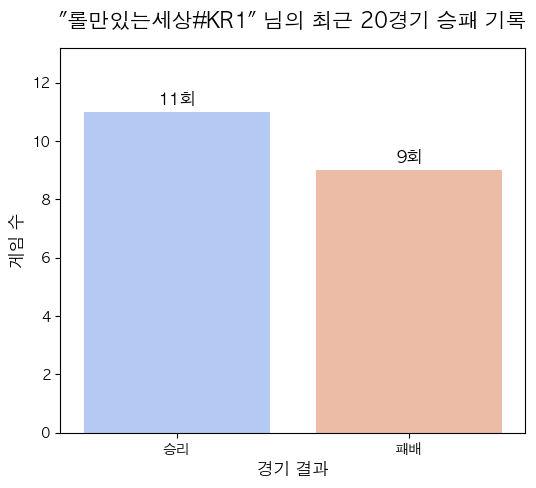

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


my_riot_id = "롤만있는세상#KR1"
my_games_df = all_df[all_df['Riot ID'] == my_riot_id].copy()

if not my_games_df.empty:
    win_loss_counts = my_games_df['win'].value_counts()

    plt.figure(figsize=(6, 5))
        
        # x축에 표시될 라벨을 [True, False] -> ['승리', '패배']로 직접 바꿔줍니다.
        # 이렇게 하면 순서가 바뀌어도 안전합니다.
    labels = win_loss_counts.index.map({True: '승리', False: '패배'})
        
    ax = sns.barplot(x=labels, y=win_loss_counts.values, palette='coolwarm')

        # 제목과 라벨을 좀 더 구체적으로 변경합니다.
    plt.title(f'"{my_riot_id}" 님의 최근 {len(my_games_df)}경기 승패 기록', fontsize=15, pad=15)
    plt.xlabel('경기 결과', fontsize=12)
    plt.ylabel('게임 수', fontsize=12)
    plt.ylim(0, win_loss_counts.max() * 1.2) # 막대 위에 텍스트를 표시할 공간 확보

        # 4. (개선) 막대 위에 실제 게임 횟수를 텍스트로 표시합니다.
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}회',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=12)
        
    plt.savefig('win_loss_ratio.png') # 이미지 파일로 저장
    plt.show()
        
else:
    print(f"'{my_riot_id}'에 해당하는 경기 기록을 찾을 수 없습니다.")

In [14]:
import matplotlib.font_manager as fm

# matplotlib이 인식하는 모든 폰트 리스트 출력
font_list = sorted([f.name for f in fm.fontManager.ttflist])

# 보기 좋게 5개씩 출력
for i in range(0, len(font_list), 5):
    print(font_list[i:i+5])

['.Aqua Kana', '.CJK Symbols Fallback HK', '.DecoType Nastaleeq Urdu UI', '.Keyboard', '.New York']
['.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded']
['.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian']
['.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono']
['.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', '.Zither India', '.Zither India Narrow']
['Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter']
['Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille']
['Apple Braille', 'Apple Chancery', 'Apple LiGothic', 'Apple LiSung', 'Apple SD Gothic Neo']
['Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial']
['Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow']
['Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS']
['Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Ne